<p id="part0"></p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: black">MULTIPLE LINEAR REGRESSION</p>

<p style="font-family: Arials; font-size: 16px;text-align: center;; font-style: normal;  letter-spacing: 2px;  line-height:1.3">
Penerapan Regresi Linier ini digunakan untuk memberi saran kepada perusahaan E-commerce yang menjual pakaian secara online, namun mereka juga memiliki sesi konsultasi gaya dan pakaian di toko secara offline. Perusahaan ini mencoba untuk memutuskan apakah akan memfokuskan upaya mereka pada pengalaman aplikasi smartphone atau situs web yang mereka miliki.</a></p>

# Library Needed

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import kstest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Read the Data

Data E-commerce customers dengan variabel yang ada di dalamnya yaitu Avg. Session Length, Time on App, Time on Website, Length of Membership. Berikut ini penjelasan setiap variabelnya:

- **Avg. Session Length:** Rata-rata sesi konsultasi gaya di dalam toko secara offline

- **Time on App:** Rata-rata waktu yang dihabiskan di aplikasi toko dalam menit 

- **Time on Website:** Rata-rata waktu yang dihabiskan di website toko dalam menit

- **Length of Membership:** Berapa tahun pelanggan sudah menjadi member di toko tersebut

- **Yearly Amount Spent ($):** Jumlah yang dibelanjakan per tahun

NB: Data berjenis rasio

In [115]:
data = pd.read_csv('Ecommerce Customers.csv')
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Information Data

In [116]:
data.shape

(500, 8)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [118]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [119]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# EDA TIME!

In [120]:
sns.set_palette("viridis")
sns.set_style('darkgrid')

## Variable Independent (Feature)

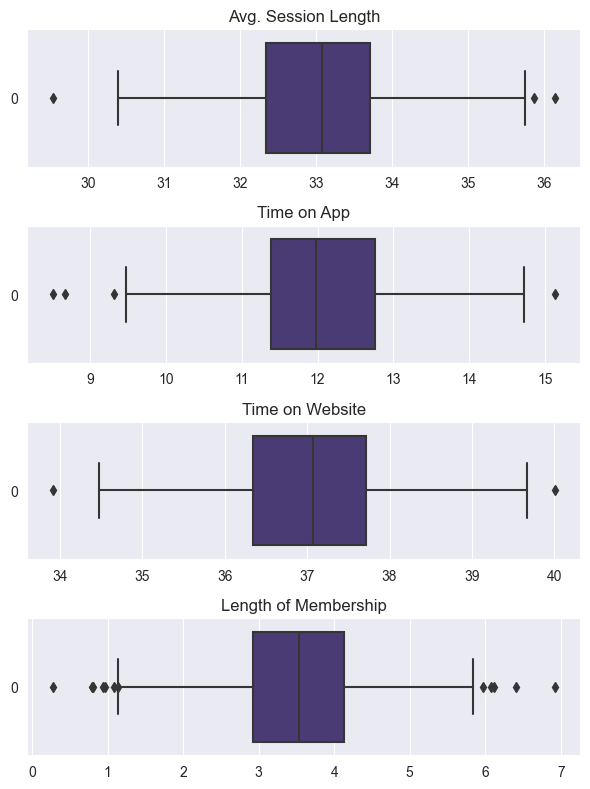

In [121]:
fig, axs = plt.subplots(4, figsize = (6,8))
sns.boxplot(data['Avg. Session Length'], ax = axs[0], orient='h')
axs[0].set_title('Avg. Session Length')

sns.boxplot(data['Time on App'], ax = axs[1], orient='h')
axs[1].set_title('Time on App')

sns.boxplot(data['Time on Website'], ax = axs[2], orient='h')
axs[2].set_title('Time on Website')

sns.boxplot(data['Length of Membership'], ax = axs[3], orient='h')
axs[3].set_title('Length of Membership')

plt.tight_layout()

## Variable Dependent (Target)

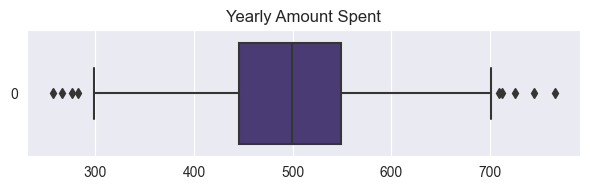

In [122]:
fig, axs = plt.subplots(1, figsize=(6, 2))
sns.boxplot(data['Yearly Amount Spent'], orient='h')
axs.set_title('Yearly Amount Spent')
plt.tight_layout()

## Correlation Between the Feature

In [123]:
ploting = data.drop(['Avatar', 'Address', 'Email'], axis = 1)

In [124]:
ploting.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


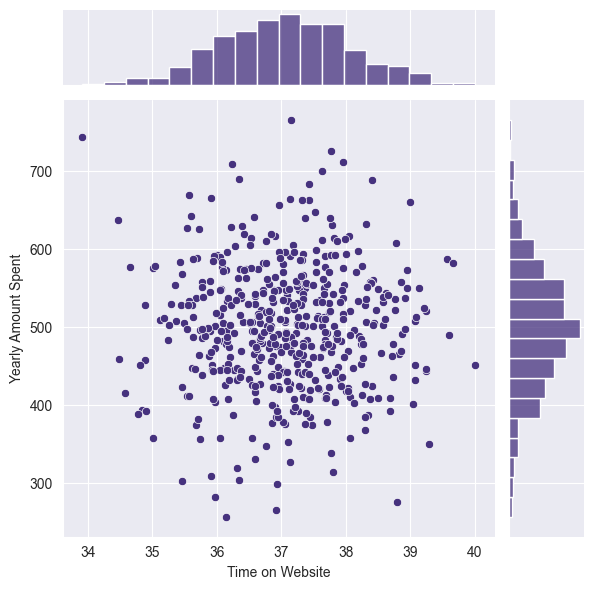

In [125]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

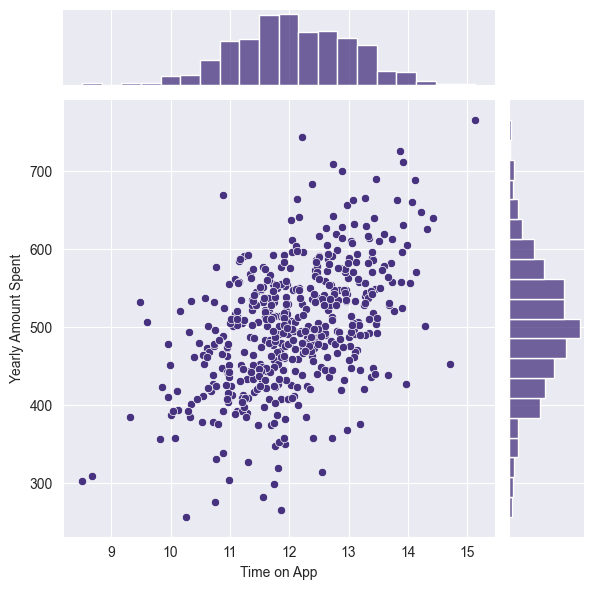

In [126]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)

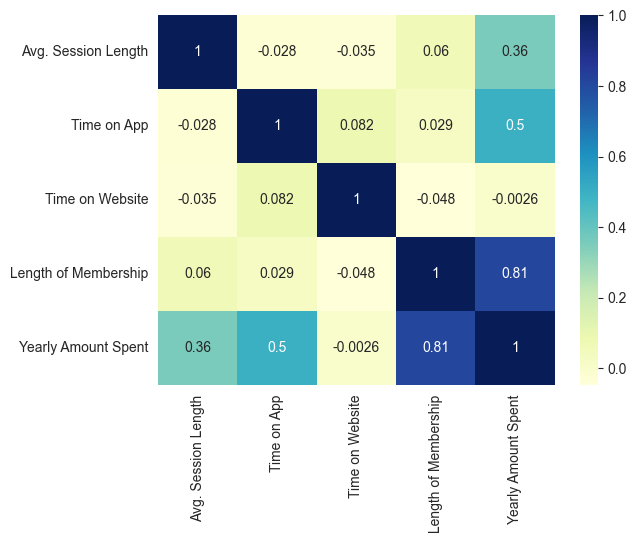

In [127]:
sns.heatmap(ploting.corr(), cmap="YlGnBu", annot = True)
plt.show()

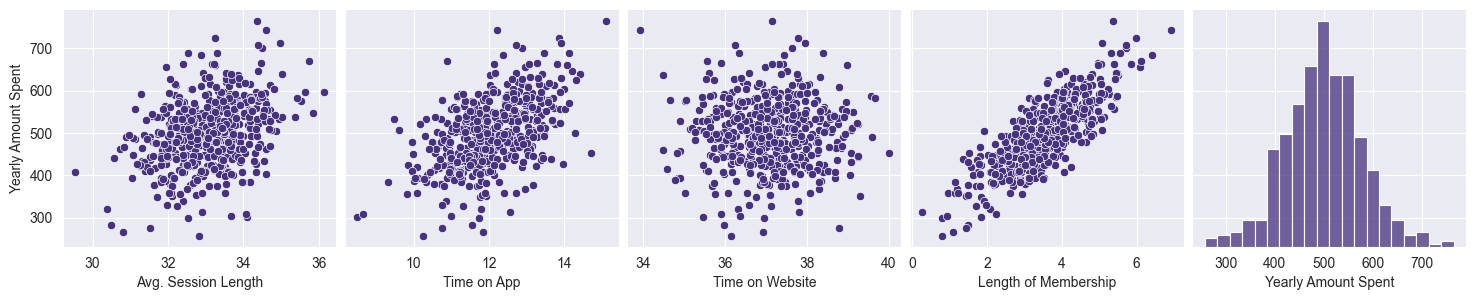

In [128]:
sns.pairplot(ploting, y_vars='Yearly Amount Spent', height=3, aspect=1, kind='scatter')
plt.show()

Dari dua plot diatas, terlihat adanya korelasi yang kuat antara 'Length of Membership' dan 'Yearly Amount Spent'.

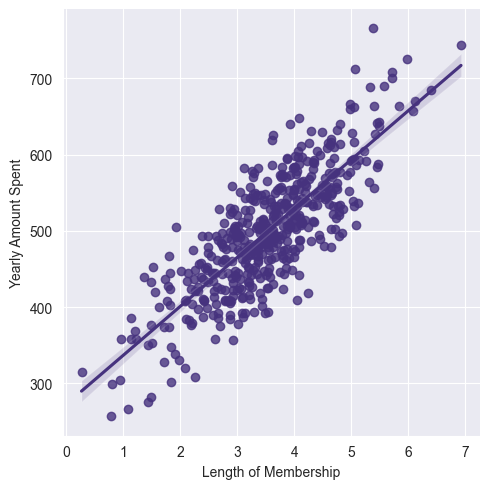

In [129]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

# Modeling

**Formula Multiple Linear Regression:**
![Alt text](https://lh4.googleusercontent.com/NMXY1P2t6v5Io3vMx583fgoGAZtQMGkcLnuUMjqT1vOrI5gpLEdY_fjaJEeu57ffvBzOqxloTjblbzJCeiFs7U10XuX0nb60FcxwF2h_WCwpyFhzb8Qwrzxjof9qJ1F127qa_L7kzQCxl6bZ1Q)

## Split Data to Train & Test

In [130]:
X = data[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [132]:
X_train.shape
# X_test.shape

(350, 4)

In [133]:
y_train.shape
# y_test.shape

(350,)

## Training the Model

In [134]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [135]:
params_df = lr.params.to_frame().T
params_df

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,-1047.932782,25.98155,38.590159,0.190405,61.279097


In [136]:
params_values = params_df.values.flatten()

In [137]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     4641.
Date:                 Wed, 10 Jan 2024   Prob (F-statistic):          1.88e-298
Time:                         11:43:32   Log-Likelihood:                -1314.1
No. Observations:                  350   AIC:                             2638.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [157]:
lr.predict(X_train_sm)

202    449.371272
428    557.835613
392    553.335813
86     486.008687
443    548.081272
          ...    
63     470.717867
326    506.957495
337    449.300959
11     513.967973
351    529.749276
Length: 350, dtype: float64

## Linear Model Build

In [138]:
b0, b1, b2, b3, b4 = params_values

In [164]:
regression_line_train = [b0 + b1*X_train['Avg. Session Length'] + b2*X_train['Time on App'] 
                         + b3*X_train['Time on Website'] + b4*X_train['Length of Membership']]

## Visualizing Linear Models

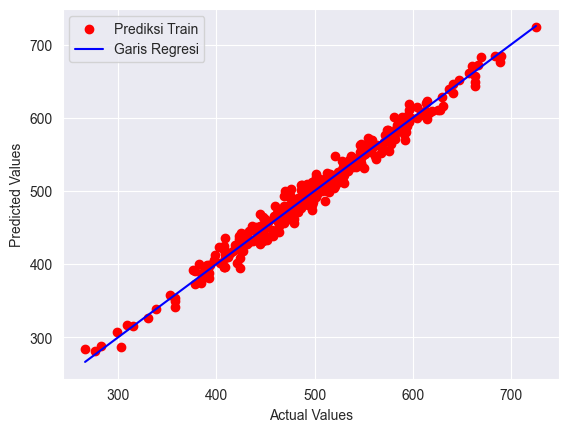

In [165]:
plt.scatter(y_train, regression_line_train, label='Prediksi Train', color='red')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='blue', label='Garis Regresi')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()

## Model Evaluation

### Residual Analyst

In [141]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [142]:
res

202    -5.405645
428    -1.537472
392    -4.204239
86      1.370619
443    13.435260
         ...    
63     12.441854
326    -1.727427
337    -9.298212
11      8.369432
351     3.647278
Length: 350, dtype: float64

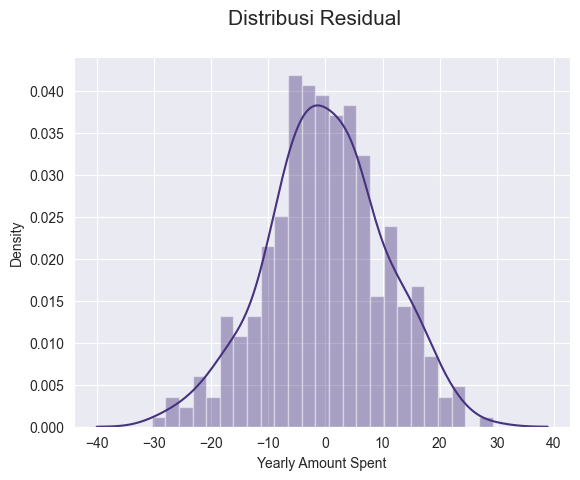

In [143]:
fig = plt.figure()
sns.distplot(res, bins = 25)
fig.suptitle('Distribusi Residual', fontsize = 15)
plt.xlabel('Yearly Amount Spent', fontsize = 10)

plt.show()

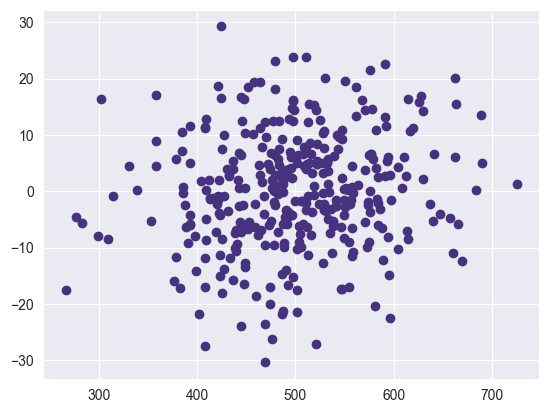

In [144]:
plt.scatter(y_train,res)
plt.show()

Nilai residual berdistribusi normal dengan rata-ratanya 0 dan tersebar secara merata.

# Predictions on the Test Data

In [145]:
regression_line_test = [b0 + b1*X_test['Avg. Session Length'] + b2*X_test['Time on App'] 
                         + b3*X_test['Time on Website'] + b4*X_test['Length of Membership']]

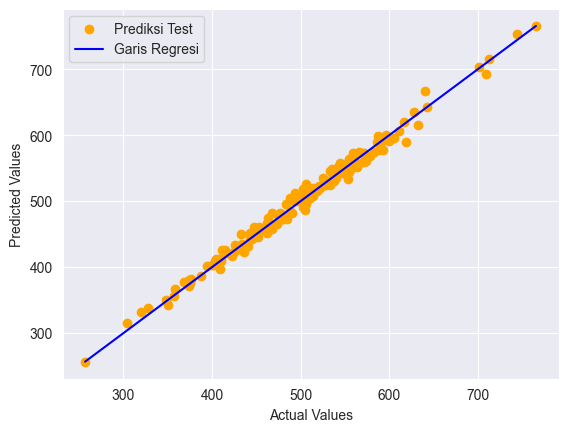

In [146]:
plt.scatter(y_test, regression_line_test, label='Prediksi Test', color='orange')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='Garis Regresi')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()

# Metric's Evaluation

In [147]:
# Menambahkan sebuah konstanta ke X_test
X_test_sm = sm.add_constant(X_test)

# Memprediksi nilai y yang berhubungan dengan X_test_sm
y_pred = lr.predict(X_test_sm)

In [148]:
y_pred.head()

18     456.441861
361    402.720053
104    409.253154
4      591.431034
156    590.014373
dtype: float64

## Mean Absolute Error (MAE)

In [149]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 7.228148667775331


## Mean Squared Error (MSE)

In [150]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 8.933815076038183


## Root Mean Square Error (RMSE)

In [151]:
rmse = np.sqrt(mse)
print('Root Mean Square Error (RMSE):', rmse)

Root Mean Square Error (RMSE): 2.9889488245933857


## R-squared (R2)

In [152]:
r_squared = r2_score(y_test, y_pred)
print("R-squared (R2):", r_squared)

R-squared (R2): 0.9890046246513213


## Final Metric Evaluation

In [153]:
matev = pd.DataFrame({
    "Metrics": ["MAE", "MSE", "RMSE", "R2 %"],
    "Evaluation Value": ["{:.4f}".format(mae), "{:.4f}".format(mse), "{:.4f}".format(rmse),"{:.2f}".format(r_squared)]
})

matev.set_index('Metrics', inplace=True)
matev1 = matev[matev.index != 'const']

matev1

,Evaluation Value
Metrics,
MAE,7.2281
MSE,8.9338
RMSE,2.9889
R2 %,0.99


# Conclusions

In [154]:
coefficients_df = pd.DataFrame(list(lr.params.items()), columns=['Feature', 'Coefficient'])
coefficients_df.set_index('Feature', inplace=True)
coefficients_df = coefficients_df[coefficients_df.index != 'const']

coefficients_df 

,Coefficient
Feature,
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Menafsirkan koefisien:

- Dengan mempertahankan semua fitur lainnya tetap, peningkatan 1 unit dalam Avg. Durasi Sesi dikaitkan dengan peningkatan 25,98 total dolar yang dibelanjakan.
- Dengan mempertahankan semua fitur lain tetap, peningkatan 1 unit dalam Waktu di Aplikasi dikaitkan dengan peningkatan 38,59 total dolar yang dibelanjakan.
- Dengan mempertahankan semua fitur lain tetap, peningkatan 1 unit dalam Waktu di Situs Web dikaitkan dengan peningkatan 0,19 total dolar yang dibelanjakan.
- Dengan mempertahankan semua fitur lainnya tetap, peningkatan 1 unit dalam Lama Keanggotaan dikaitkan dengan peningkatan 61,27 total dolar yang dibelanjakan.

Jadi, karena Time on App adalah faktor yang jauh lebih signifikan daripada Time on Website, perusahaan memiliki pilihan: mereka dapat memfokuskan semua perhatian pada Aplikasi karena itulah yang menghasilkan uang paling banyak, atau mereka dapat fokus pada Situs Web karena kinerjanya sangat jelek.